In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [144]:
df = pd.read_csv('flights.csv')
df = df.dropna()
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [145]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


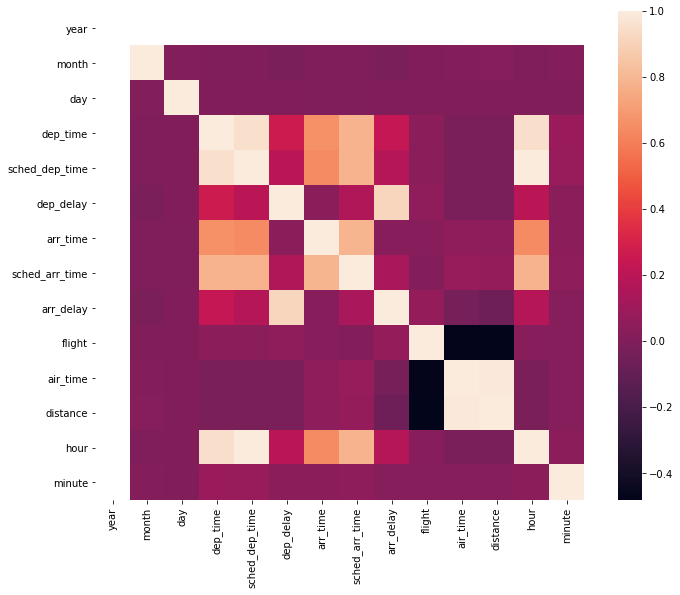

In [48]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True);
plt.show()

In [49]:
#2 View of the total amount of delayed arrival time
delayed_arrivals = df.groupby('carrier')['arr_delay'].count().sort_values()
print(delayed_arrivals)

carrier
OO       29
HA      342
YV      544
F9      681
AS      709
FL     3175
VX     5116
WN    12044
9E    17294
US    19831
MQ    25037
AA    31947
DL    47658
EV    51108
B6    54049
UA    57782
Name: arr_delay, dtype: int64


In [50]:
# 2 View of the total amount of delayed departures
delayed_departures = df.groupby('carrier')['dep_delay'].count().sort_values()
print(delayed_departures)

carrier
OO       29
HA      342
YV      544
F9      681
AS      709
FL     3175
VX     5116
WN    12044
9E    17294
US    19831
MQ    25037
AA    31947
DL    47658
EV    51108
B6    54049
UA    57782
Name: dep_delay, dtype: int64


In [43]:
# 6. View of the month with the most delayed departures
months_delayed_arrival_times = df.groupby('month')['arr_delay'].count().sort_values()
print(months_delayed_arrival_times)

month
2     23611
1     26398
11    26971
9     27010
12    27020
6     27075
4     27564
3     27902
5     28128
7     28293
10    28618
8     28756
Name: arr_delay, dtype: int64


In [54]:
months_delayed_arrival_times = df.groupby('month')['dep_delay'].count().sort_values()
print(months_delayed_arrival_times)

month
2     23611
1     26398
11    26971
9     27010
12    27020
6     27075
4     27564
3     27902
5     28128
7     28293
10    28618
8     28756
Name: dep_delay, dtype: int64


In [61]:
trip_with_most_arrival_delays = df.groupby(['origin', 'dest'])['arr_delay'].count().sort_values(ascending = True)
print(trip_with_most_arrival_delays)

origin  dest
JFK     MEM         1
        STL         1
        BHM         1
LGA     LEX         1
JFK     JAC         2
                ...  
LGA     CLT      5961
JFK     SFO      8109
LGA     ORD      8507
        ATL     10041
JFK     LAX     11159
Name: arr_delay, Length: 223, dtype: int64


In [63]:
trip_with_most_departure_delays = df.groupby(['origin', 'dest'])['dep_delay'].count().sort_values(ascending = True)
print(trip_with_most_departure_delays)

origin  dest
JFK     MEM         1
        STL         1
        BHM         1
LGA     LEX         1
JFK     JAC         2
                ...  
LGA     CLT      5961
JFK     SFO      8109
LGA     ORD      8507
        ATL     10041
JFK     LAX     11159
Name: dep_delay, Length: 223, dtype: int64


In [146]:
# 2
trip_with_most_departure_delays = df.groupby(['origin'])['dep_delay'].count().sort_values(ascending = True)
print(trip_with_most_departure_delays)

origin
LGA    101140
JFK    109079
EWR    117127
Name: dep_delay, dtype: int64


In [81]:
# Task 3
# I limited the total to 20,000 as you asked us to limit it to no more than 20k per airline
pop_data = df[(df['carrier'] == 'UA') | (df['carrier'] == 'DL')][['carrier', 'arr_delay']]
pop_data = pop_data.head(20000)
pop_data

,carrier,arr_delay
0,UA,11.0
1,UA,20.0
4,DL,-25.0
5,UA,12.0
12,UA,7.0
...,...,...
64108,UA,-2.0
64109,UA,-10.0
64112,UA,-11.0
64114,DL,-9.0


In [87]:
# Task 4
dl = pop_data[pop_data['carrier'] == 'DL'].sample(n=1000, random_state=5)
dl['sample_id'] = 1
ua = pop_data[pop_data['carrier'] == 'UA'].sample(n=1000, random_state=5)
ua['sample_id'] = 2

,carrier,arr_delay,sample_id
39371,UA,-15.0,2
40397,UA,6.0,2
56185,UA,5.0,2
5100,UA,19.0,2
53250,UA,-17.0,2
...,...,...,...
12854,UA,39.0,2
50920,UA,-20.0,2
54336,UA,-3.0,2
57320,UA,5.0,2


In [91]:
# Task 5
samples = pd.concat([dl, ua])
samples

,carrier,arr_delay,sample_id
3162,DL,-16.0,1
42417,DL,2.0,1
21490,DL,-32.0,1
20084,DL,-16.0,1
53875,DL,-6.0,1
...,...,...,...
12854,UA,39.0,2
50920,UA,-20.0,2
54336,UA,-3.0,2
57320,UA,5.0,2


In [115]:
# Task 6
mean = samples.groupby('carrier').mean()
mean
standard_dev = samples.groupby('carrier').std()
standard_error = standard_dev['arr_delay']/ numpy.sqrt(1000)
print(mean)
print(standard_error)

         arr_delay  sample_id
carrier                      
DL          -6.672          1
UA          -0.898          2
carrier
DL    0.813181
UA    0.946005
Name: arr_delay, dtype: float64


In [125]:
# Task 7
lower_value = samples.groupby('carrier').min()
upper_value = samples.groupby('carrier').max()

confidence_interval = lower_value - mean - upper_value
confidence_interval['arr_delay']

carrier
DL   -219.328
UA   -310.102
Name: arr_delay, dtype: float64

In [163]:
# Task 8
from scipy.stats import ttest_ind

cat1 = samples[samples.carrier =='UA']
cat2 = samples[samples.carrier =='DL']
cat2

np.set_printoptions(suppress=True)
# print(cat2.iloc[0]['arr_delay'])
stats = ttest_ind(cat1['arr_delay'], cat2['arr_delay'])


print(stats.t.ppf(q=0.025, df = 999))

AttributeError: 'Ttest_indResult' object has no attribute 't'